In [ ]:
normal_swat_down = pd.read_csv("normal_swat_down.csv")
attack_swat_down = pd.read_csv("attack_swat_down.csv")
print(normal_swat_down.shape, attack_swat_down.shape)

(18030, 52) (18030, 52)


In [ ]:
normal_swat_down_label = normal_swat_down['Normal/Attack']
attack_swat_down_label = attack_swat_down['Normal/Attack']

In [ ]:
print(normal_swat_down_label.shape, attack_swat_down_label.shape)
print(np.unique(normal_swat_down_label), np.unique(attack_swat_down_label))

(18030,) (18030,)
[0.] [0. 1.]


In [ ]:
normal_swat_down = normal_swat_down.drop(["Normal/Attack" ] , axis = 1)
attack_swat_down = attack_swat_down.drop(["Normal/Attack" ] , axis = 1)

In [ ]:
print(normal_swat_down.shape, attack_swat_down.shape)

(18030, 51) (18030, 51)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Thesis/usad

/content/drive/MyDrive/Thesis/usad


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from utils import *
from usad import *

# Load the dataset (SWAT, WADI)

In [4]:
normal_swat_down = pd.read_csv("normal_swat_down.csv")
attack_swat_down = pd.read_csv("attack_swat_down.csv")
print(normal_swat_down.shape, attack_swat_down.shape)

(18030, 52) (18030, 52)


In [5]:
normal_swat_down_label = normal_swat_down['Normal/Attack']
attack_swat_down_label = attack_swat_down['Normal/Attack']

In [6]:
print(normal_swat_down_label.shape, attack_swat_down_label.shape)
print(np.unique(normal_swat_down_label), np.unique(attack_swat_down_label))

(18030,) (18030,)
[0.] [0. 1.]


In [7]:
normal_swat_down = normal_swat_down.drop(["Normal/Attack" ] , axis = 1)
attack_swat_down = attack_swat_down.drop(["Normal/Attack" ] , axis = 1)

In [8]:
print(normal_swat_down.shape, attack_swat_down.shape)

(18030, 51) (18030, 51)


# Normalization(SWAT_down)



In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x = normal_swat_down.values
x_scaled = min_max_scaler.fit_transform(x)
normal_down = pd.DataFrame(x_scaled)

In [10]:
x_test = attack_swat_down.values
x_test_scaled = min_max_scaler.transform(x_test)
attack_down = pd.DataFrame(x_test_scaled)

### Windowing (SWaT_down)

In [11]:
window_size = 30

In [12]:
windows_normal_down=normal_down.values[np.arange(window_size)[None, :] + np.arange(normal_down.shape[0]-window_size)[:, None]]
windows_normal_down.shape

(18000, 30, 51)

In [13]:
windows_attack_down=attack_down.values[np.arange(window_size)[None, :] + np.arange(attack_down.shape[0]-window_size)[:, None]]
windows_attack_down.shape

(18000, 30, 51)

# Training the model(With full columns, SWAT)

In [14]:
import time

In [15]:
start_time = time.time()

In [16]:
import torch.utils.data as data_utils

BATCH_SIZE =  900
N_EPOCHS = 20
hidden_size = 20

w_size=windows_normal_down.shape[1]*windows_normal_down.shape[2]
z_size=windows_normal_down.shape[1]*hidden_size

windows_normal_train = windows_normal_down[:int(np.floor(.8 *  windows_normal_down.shape[0]))]
windows_normal_val = windows_normal_down[int(np.floor(.8 *  windows_normal_down.shape[0])):int(np.floor(windows_normal_down.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack_down).float().view(([windows_attack_down.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [17]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0549, val_loss2: 0.0492
Epoch [1], val_loss1: 0.0413, val_loss2: -0.0001
Epoch [2], val_loss1: 0.0448, val_loss2: -0.0154
Epoch [3], val_loss1: 0.0412, val_loss2: -0.0210
Epoch [4], val_loss1: 0.0413, val_loss2: -0.0252
Epoch [5], val_loss1: 0.0436, val_loss2: -0.0298
Epoch [6], val_loss1: 0.0416, val_loss2: -0.0301
Epoch [7], val_loss1: 0.0396, val_loss2: -0.0298
Epoch [8], val_loss1: 0.0417, val_loss2: -0.0328
Epoch [9], val_loss1: 0.0425, val_loss2: -0.0344
Epoch [10], val_loss1: 0.0400, val_loss2: -0.0329
Epoch [11], val_loss1: 0.0420, val_loss2: -0.0352
Epoch [12], val_loss1: 0.0467, val_loss2: -0.0400
Epoch [13], val_loss1: 0.0448, val_loss2: -0.0388
Epoch [14], val_loss1: 0.0439, val_loss2: -0.0384
Epoch [15], val_loss1: 0.0437, val_loss2: -0.0386
Epoch [16], val_loss1: 0.0447, val_loss2: -0.0398
Epoch [17], val_loss1: 0.0443, val_loss2: -0.0397
Epoch [18], val_loss1: 0.0433, val_loss2: -0.0390
Epoch [19], val_loss1: 0.0420, val_loss2: -0.0379


In [18]:
end_time = time.time()
elapsed_time = end_time - start_time

In [19]:
print(elapsed_time)

835.3506355285645


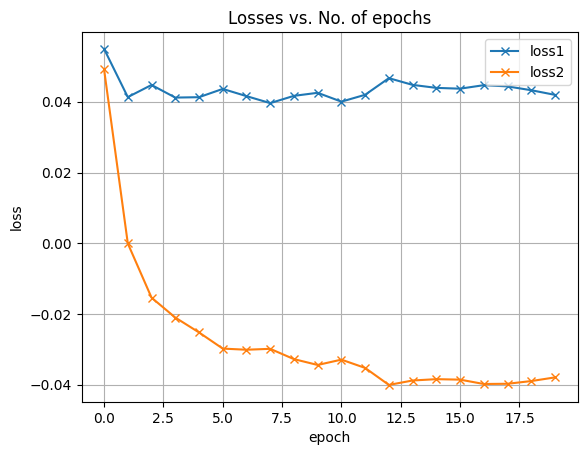

In [20]:
plot_history(history)

In [21]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_SWaT.pth")

# Testing the model(with full columns, SWAT)

In [22]:
checkpoint = torch.load("model_SWaT.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [23]:
def training_scores(model, train_loader, val_loader=None, alpha=.5, beta=.5):
    if val_loader is None:
      trainval=train_loader
    else:
      trainval = [d for dl in [train_loader, val_loader] for d in dl]
    results=[]
    for [batch] in trainval:
        batch=to_device(batch,device)
        w1=model.decoder1(model.encoder(batch))
        w2=model.decoder2(model.encoder(w1))
        results.append(alpha*torch.mean((batch-w1)**2,dim=1)+beta*torch.mean((batch-w2)**2,dim=1))
    return results

In [24]:
def testing_scores(model, test_loader, alpha=.5, beta=.5):
  results=[]
  for [batch] in test_loader:
      batch=to_device(batch,device)
      w1=model.decoder1(model.encoder(batch))
      w2=model.decoder2(model.encoder(w1))
      #results.append(alpha*torch.mean((batch-w1)**2,axis=1)+beta*torch.mean((batch-w2)**2,axis=1))
      results.append(alpha*torch.mean((batch-w1)**2,dim=1)+beta*torch.mean((batch-w2)**2,dim=1))
  return results

In [25]:
training_scores_list=training_scores(model,train_loader,val_loader)

In [26]:
training_scores_concat=np.concatenate([torch.stack(training_scores_list[:-1]).flatten().detach().cpu().numpy(),
                            training_scores_list[-1].flatten().detach().cpu().numpy()])

In [27]:
print(training_scores_concat)

[0.05209973 0.05116912 0.05084582 ... 0.03510713 0.0352785  0.0355214 ]


In [28]:
min(training_scores_concat)

0.024057833

In [29]:
results=training_scores(model, test_loader) # testing

In [30]:
print(results)

[tensor([0.2160, 0.2230, 0.2281, 0.2360, 0.2458, 0.2508, 0.2522, 0.2378, 0.2439,
        0.2431, 0.2454, 0.2430, 0.2391, 0.2380, 0.2374, 0.2410, 0.2463, 0.2586,
        0.2575, 0.2568, 0.2641, 0.2590, 0.2468, 0.2475, 0.2310, 0.2253, 0.2251,
        0.2312, 0.2387, 0.2451, 0.2577, 0.2491, 0.2434, 0.2328, 0.2323, 0.2412,
        0.2459, 0.2608, 0.2532, 0.2590, 0.2450, 0.2461, 0.2614, 0.2700, 0.2723,
        0.2650, 0.2631, 0.2517, 0.2434, 0.2433, 0.2447, 0.2511, 0.2629, 0.2533,
        0.2579, 0.2582, 0.2573, 0.2509, 0.2590, 0.2562, 0.2486, 0.2486, 0.2500,
        0.2487, 0.2452, 0.2311, 0.2311, 0.2230, 0.2395, 0.2318, 0.2462, 0.2450,
        0.2467, 0.2423, 0.2290, 0.2418, 0.2573, 0.2578, 0.2667, 0.2601, 0.2677,
        0.2592, 0.2604, 0.2566, 0.2605, 0.2611, 0.2536, 0.2486, 0.2406, 0.2426,
        0.2404, 0.2343, 0.2414, 0.2419, 0.2445, 0.2490, 0.2575, 0.2646, 0.2647,
        0.2794, 0.2801, 0.2919, 0.2921, 0.2866, 0.3025, 0.2955, 0.2883, 0.2890,
        0.2833, 0.2968, 0.2981, 0.3118,

In [31]:
windows_labels=[]
for i in range(len(attack_swat_down_label)-window_size):
    windows_labels.append(list(np.int_(attack_swat_down_label[i:i+window_size])))

In [43]:
len(windows_labels)

18000

In [42]:
np.unique(windows_labels)

array([0, 1])

In [45]:
y_test_sel = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels] # this is with the point adjust?

In [46]:
y_pred_sel=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                            results[-1].flatten().detach().cpu().numpy()])

In [47]:
len(y_pred_sel)

18000

In [34]:
def testing_threshold(model, test_loader, alpha=.5, beta=.5, contamination=0.1):
  results=testing_scores(model, test_loader, alpha=.5, beta=.5)
  score_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().numpy(),
                                         results[-1].flatten().detach().numpy()])
  return np.sort(score_pred)[int(len(score_pred)*(1-contamination))]

In [35]:
results_threshold=testing_threshold(model,test_loader,alpha=.5, beta=.5, contamination=0.10)

In [37]:
results_threshold

0.2682904

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.metrics import roc_curve,roc_auc_score

In [40]:
def ROC(y_test,y_pred):
    fpr,tpr,tr=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    idx=np.argwhere(np.diff(np.sign(tpr-(1-fpr)))).flatten()

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot(fpr,1-fpr,'r:')
    plt.plot(fpr[idx],tpr[idx], 'ro')
    plt.legend(loc=4)
    plt.grid()
    plt.show()
    return tr[idx]

In [48]:
threshold=ROC(y_test_sel,y_pred_sel)
threshold

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
threshold=results_threshold # Decide on your own threshold
y_pred_label = [1.0 if (score > threshold) else 0 for score in y_pred ]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label,pos_label=1)
recall=recall_score(y_test,y_pred_label,pos_label=1)
f1=f1_score(y_test,y_pred_label,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)


precision= 0.7033175355450237
recall= 0.08919341266979204
f1= 0.15831021975677406


# Training with selected columns(SWAT)

Load datset of SWaT with selected columns

In [ ]:
normal_swat_sel = pd.read_csv("normal_swat_sel.csv")
attack_swat_sel = pd.read_csv("attack_swat_sel.csv")
print(normal_swat_sel.shape, attack_swat_sel.shape)

(18030, 52) (18030, 52)


In [ ]:
normal_swat_sel_label = normal_swat_sel['Normal/Attack']
attack_swat_sel_label = attack_swat_sel['Normal/Attack']

In [ ]:
print(normal_swat_sel_label.shape, attack_swat_sel_label.shape)
print(np.unique(normal_swat_sel_label), np.unique(attack_swat_sel_label))

(18030,) (18030,)
[0.] [0. 1.]


In [ ]:
normal_swat_sel = normal_swat_sel.drop(["Normal/Attack" ] , axis = 1)
attack_swat_sel = attack_swat_sel.drop(["Normal/Attack" ] , axis = 1)

In [ ]:
print(normal_swat_sel.shape, attack_swat_sel.shape)

(18030, 51) (18030, 51)


Windowing

In [ ]:
window_size = 30

In [ ]:
windows_normal_swat_sel=normal_swat_sel.values[np.arange(window_size)[None, :] + np.arange(normal_swat_sel.shape[0]-window_size)[:, None]]
windows_normal_swat_sel.shape

(10560, 12, 8)

In [ ]:
windows_attack_swat_sel=attack_swat_sel.values[np.arange(window_size)[None, :] + np.arange(attack_swat_sel.shape[0]-window_size)[:, None]]
windows_attack_swat_sel.shape

(10560, 12, 8)

In [ ]:
import torch.utils.data as data_utils

BATCH_SIZE =  900
N_EPOCHS = 20
hidden_size = 20

w_size_sel=windows_normal_swat_sel.shape[1]*windows_normal_swat_sel.shape[2]
z_size_sel=windows_normal_swat_sel.shape[1]*hidden_size

windows_normal_train_sel = windows_normal_swat_sel[:int(np.floor(.8 *  windows_normal_swat_sel.shape[0]))]
windows_normal_val_sel = windows_normal_swat_sel[int(np.floor(.8 *  windows_normal_swat_sel.shape[0])):int(np.floor(windows_normal_swat_sel.shape[0]))]

train_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train_sel).float().view(([windows_normal_train_sel.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val_sel).float().view(([windows_normal_val_sel.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_swat_sel).float().view(([windows_normal_swat_sel.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model_sel = UsadModel(w_size, z_size)
model_sel = to_device(model_sel,device)

In [ ]:
history_2 = training(N_EPOCHS,model_sel,train_loader_sel,val_loader_sel)

Epoch [0], val_loss1: 0.1187, val_loss2: 0.1255
Epoch [1], val_loss1: 0.0612, val_loss2: -0.0004
Epoch [2], val_loss1: 0.0351, val_loss2: -0.0118
Epoch [3], val_loss1: 0.0279, val_loss2: -0.0141
Epoch [4], val_loss1: 0.0260, val_loss2: -0.0158
Epoch [5], val_loss1: 0.0240, val_loss2: -0.0160
Epoch [6], val_loss1: 0.0226, val_loss2: -0.0161
Epoch [7], val_loss1: 0.0226, val_loss2: -0.0170
Epoch [8], val_loss1: 0.0226, val_loss2: -0.0176
Epoch [9], val_loss1: 0.0234, val_loss2: -0.0188
Epoch [10], val_loss1: 0.0220, val_loss2: -0.0180
Epoch [11], val_loss1: 0.0271, val_loss2: -0.0230
Epoch [12], val_loss1: 0.0246, val_loss2: -0.0210
Epoch [13], val_loss1: 0.0249, val_loss2: -0.0215
Epoch [14], val_loss1: 0.0229, val_loss2: -0.0199


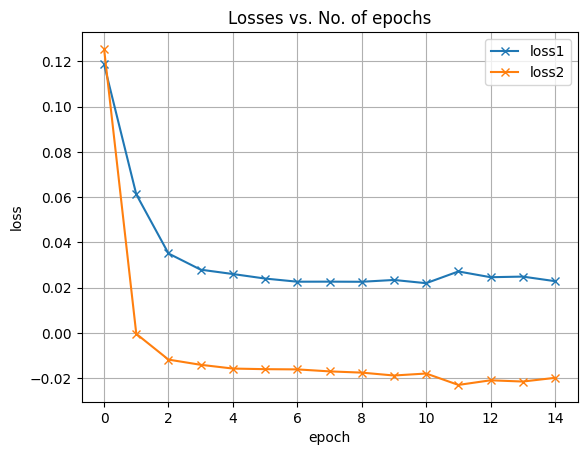

In [ ]:
plot_history(history_2)

In [ ]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_SWaT_sel.pth")

#Testing with selected columns(SWAT)

In [ ]:
checkpoint = torch.load("model_SWaT_sel.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [ ]:
training_scores_list_2=training_scores(model_sel,train_loader_sel,val_loader_sel)

In [ ]:
training_scores_concat_2=np.concatenate([torch.stack(training_scores_list_2[:-1]).flatten().detach().cpu().numpy(),
                            training_scores_list_2[-1].flatten().detach().cpu().numpy()])

In [ ]:
print(training_scores_concat_2)

[0.01834637 0.01878133 0.0186059  ... 0.01946718 0.02092467 0.02116553]


In [ ]:
min(training_scores_concat_2)

0.007661743

In [ ]:
results_2=training_scores(model_sel, test_loader_sel) # testing

In [ ]:
print(results_2)

[tensor([270822.2188, 273052.0625, 277701.1875, 276522.7500, 273641.5312,
        273041.5000, 270247.4062, 272746.2500, 271664.4688, 275251.7500,
        272276.7500, 271401.6250, 271912.1250, 266221.1250, 263260.0625,
        265527.7500, 273710.3750, 277710.8750, 278724.8750, 273187.0625,
        276896.0625, 272532.0625, 272521.8438, 273183.8125, 270097.4062,
        274544.6250, 271834.5000, 274838.5312, 273588.1875, 274340.3125,
        275922.1250, 275489.5000, 274986.0312, 277029.7500, 277930.2500,
        274659.9375, 274558.7500, 270545.8125, 272475.2500, 271587.2188,
        269012.8750, 267790.0625, 271030.2500, 276767.8750, 276705.0312,
        274974.1562, 277045.9375, 276538.6250, 283913.6875, 282879.5000,
        282042.3125, 282009.3125, 282919.9375, 281448.6875, 279135.8125,
        277515.6875, 281355.4375, 286889.5000, 280581.4688, 285600.0625,
        280568.4375, 282204.7812, 280830.6250, 279421.5000, 282035.2500,
        284106.3750, 285985.6875, 287865.8750, 283

In [ ]:
windows_labels_2=[]
for i in range(len(attack_swat_sel_label)-window_size):
    windows_labels_2.append(list(np.int_(attack_swat_sel_label[i:i+window_size])))

In [ ]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels_2] # this is with the point adjust?

In [ ]:
y_pred_2=np.concatenate([torch.stack(results_2[:-1]).flatten().detach().cpu().numpy(),
                            results_2[-1].flatten().detach().cpu().numpy()])

In [ ]:
def testing_threshold(model, test_loader, alpha=.5, beta=.5, contamination=0.1):
  results=testing_scores(model, test_loader, alpha=.5, beta=.5)
  score_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().numpy(),
                                         results[-1].flatten().detach().numpy()])
  return np.sort(score_pred)[int(len(score_pred)*(1-contamination))]

In [ ]:
results_threshold_2=testing_threshold(model_sel,test_loader_sel,alpha=.5, beta=.5, contamination=0.10)

In [ ]:
results_threshold_2

282889.84

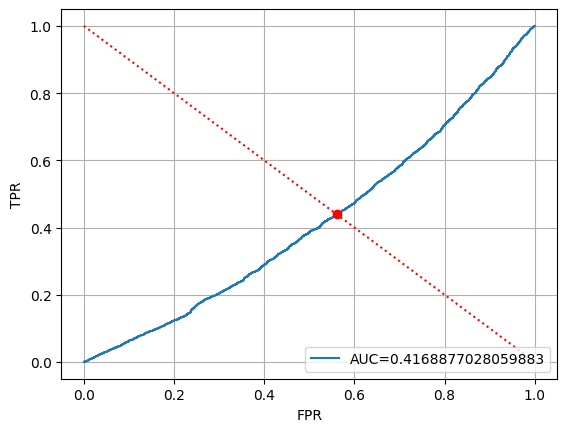

array([273657.47], dtype=float32)

In [ ]:
threshold=ROC(y_test,y_pred_2)
threshold

In [ ]:
threshold=results_threshold # Decide on your own threshold
y_pred_label_2 = [1.0 if (score > threshold) else 0 for score in y_pred_2 ]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label_2,pos_label=1)
recall=recall_score(y_test,y_pred_label_2,pos_label=1)
f1=f1_score(y_test,y_pred_label_2,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)


precision= 0.787784090909091
recall= 1.0
f1= 0.8812966788495153


# Load datasets(Downsampled, WADI)

In [ ]:
cd /content/drive/MyDrive/Thesis/usad

/content/drive/MyDrive/Thesis/usad


In [ ]:
normal_wadi_down = pd.read_csv("normal_wadi_down.csv")
attack_wadi_down = pd.read_csv("attack_wadi_down.csv")

In [ ]:
print(normal_wadi_down.shape, attack_wadi_down.shape)

(10572, 125) (10572, 125)


In [ ]:
normal_wadi = normal_wadi.drop(index=[0, 1])
attack_wadi = attack_wadi.drop(index=[0, 1])

In [ ]:
print(normal_wadi.shape, attack_wadi.shape)

(10570, 125) (10570, 125)


In [ ]:
normal_wadi = normal_wadi.iloc[:, 1:125]
attack_wadi = attack_wadi.iloc[:, 1:125]

In [ ]:
print(normal_wadi.columns, attack_wadi.columns)

Index(['1_AIT_001_PV', '1_AIT_002_PV', '1_AIT_003_PV', '1_AIT_004_PV',
       '1_AIT_005_PV', '1_FIT_001_PV', '1_LS_001_AL', '1_LS_002_AL',
       '1_LT_001_PV', '1_MV_001_STATUS',
       ...
       '3_MV_002_STATUS', '3_MV_003_STATUS', '3_P_001_STATUS',
       '3_P_002_STATUS', '3_P_003_STATUS', '3_P_004_STATUS',
       'LEAK_DIFF_PRESSURE', 'PLANT_START_STOP_LOG',
       'TOTAL_CONS_REQUIRED_FLOW', 'labels'],
      dtype='object', length=124) Index(['1_AIT_001_PV', '1_AIT_002_PV', '1_AIT_003_PV', '1_AIT_004_PV',
       '1_AIT_005_PV', '1_FIT_001_PV', '1_LS_001_AL', '1_LS_002_AL',
       '1_LT_001_PV', '1_MV_001_STATUS',
       ...
       '3_MV_002_STATUS', '3_MV_003_STATUS', '3_P_001_STATUS',
       '3_P_002_STATUS', '3_P_003_STATUS', '3_P_004_STATUS',
       'LEAK_DIFF_PRESSURE', 'PLANT_START_STOP_LOG',
       'TOTAL_CONS_REQUIRED_FLOW', 'labels'],
      dtype='object', length=124)


In [ ]:
print(normal_wadi.shape, attack_wadi.shape)

(10570, 124) (10570, 124)


In [ ]:
normal_wadi_label = normal_wadi['labels']

In [ ]:
normal_wadi = normal_wadi.drop(['labels'], axis = 1)

In [ ]:
attack_wadi_label = attack_wadi['labels']

In [ ]:
attack_wadi = attack_wadi.drop(['labels'] , axis = 1)

In [ ]:
print(normal_wadi.shape, attack_wadi.shape)

(10570, 123) (10570, 123)


# Down sampled data: normal_wadi / attack_wadi

# Normalization(WADI)

In [ ]:
print(normal_wadi.shape, normal_wadi_label.shape)
print(attack_wadi.shape, attack_wadi_label.shape)

(10570, 123) (10570,)
(10570, 123) (10570,)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x_wadi = normal_wadi.values
x_wadi_scaled = min_max_scaler.fit_transform(x_wadi)
normal = pd.DataFrame(x_wadi_scaled)

In [ ]:
normal.shape

(10570, 123)

In [ ]:
from sklearn import preprocessing
x_wadi_attack = attack_wadi.values
x_scaled_attack = min_max_scaler.transform(x_wadi_attack)
attack = pd.DataFrame(x_scaled_attack)

In [ ]:
print(normal.shape, attack.shape)

(10570, 123) (10570, 123)


### Windowing

In [ ]:
window_size = 10

In [ ]:
windows_normal_wadi=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal_wadi.shape

(10560, 10, 123)

In [ ]:
windows_attack_wadi=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack_wadi.shape

(10560, 10, 123)

# Training the model with full columns (WADI)

In [ ]:
import torch.utils.data as data_utils

BATCH_SIZE =  704
N_EPOCHS = 15
hidden_size = 30

w_size=windows_normal_wadi.shape[1]*windows_normal_wadi.shape[2]
z_size=windows_normal_wadi.shape[1]*hidden_size

windows_normal_wadi_train = windows_normal_wadi[:int(np.floor(.8 *  windows_normal_wadi.shape[0]))]
windows_normal_wadi_val = windows_normal_wadi[int(np.floor(.8 *  windows_normal_wadi.shape[0])):int(np.floor(windows_normal_wadi.shape[0]))]

train_loader_wadi = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_wadi_train).float().view(([windows_normal_wadi_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader_wadi = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_wadi_val).float().view(([windows_normal_wadi_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader_wadi = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack_wadi).float().view(([windows_attack_wadi.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model_wadi = UsadModel(w_size, z_size)
model_wadi = to_device(model_wadi,device)

In [ ]:
history_wadi = training(N_EPOCHS,model_wadi,train_loader_wadi,val_loader_wadi)

Epoch [0], val_loss1: 0.0475, val_loss2: 0.0473
Epoch [1], val_loss1: 0.0381, val_loss2: 0.0001
Epoch [2], val_loss1: 0.0356, val_loss2: -0.0119
Epoch [3], val_loss1: 0.0357, val_loss2: -0.0179
Epoch [4], val_loss1: 0.0364, val_loss2: -0.0220
Epoch [5], val_loss1: 0.0380, val_loss2: -0.0257
Epoch [6], val_loss1: 0.0399, val_loss2: -0.0290
Epoch [7], val_loss1: 0.0389, val_loss2: -0.0296
Epoch [8], val_loss1: 0.0397, val_loss2: -0.0314
Epoch [9], val_loss1: 0.0402, val_loss2: -0.0326
Epoch [10], val_loss1: 0.0392, val_loss2: -0.0324
Epoch [11], val_loss1: 0.0390, val_loss2: -0.0329
Epoch [12], val_loss1: 0.0387, val_loss2: -0.0331
Epoch [13], val_loss1: 0.0385, val_loss2: -0.0333
Epoch [14], val_loss1: 0.0382, val_loss2: -0.0334


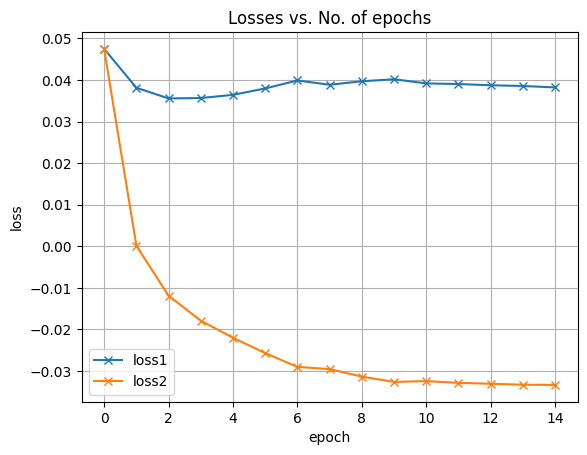

In [ ]:
plot_history(history_wadi)

In [ ]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_WADI.pth")

# Testing the model with full columns(WADI)

In [ ]:
checkpoint = torch.load("model_WADI.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [ ]:
def training_scores(model, train_loader, val_loader=None, alpha=.5, beta=.5):
    if val_loader is None:
      trainval=train_loader
    else:
      trainval = [d for dl in [train_loader, val_loader] for d in dl]
    results=[]
    for [batch] in trainval:
        batch=to_device(batch,device)
        w1=model.decoder1(model.encoder(batch))
        w2=model.decoder2(model.encoder(w1))
        results.append(alpha*torch.mean((batch-w1)**2,dim=1)+beta*torch.mean((batch-w2)**2,dim=1))
    return results

In [ ]:
def testing_scores(model, test_loader, alpha=.5, beta=.5):
  results=[]
  for [batch] in test_loader:
      batch=to_device(batch,device)
      w1=model.decoder1(model.encoder(batch))
      w2=model.decoder2(model.encoder(w1))
      #results.append(alpha*torch.mean((batch-w1)**2,axis=1)+beta*torch.mean((batch-w2)**2,axis=1))
      results.append(alpha*torch.mean((batch-w1)**2,dim=1)+beta*torch.mean((batch-w2)**2,dim=1))
  return results

In [ ]:
training_scores_list_wadi=training_scores(model_wadi,train_loader_wadi,val_loader_wadi)

In [ ]:
for i in range(len(training_scores_list_wadi)):
  print(len(training_scores_list_wadi[i]))

704
704
704
704
704
704
704
704
704
704
704
704
704
704
704


In [ ]:
len(training_scores_list_wadi)

15

In [ ]:
training_scores_concat_wadi=np.concatenate([torch.stack(training_scores_list_wadi[:-1]).flatten().detach().cpu().numpy(),
                            training_scores_list_wadi[-1].flatten().detach().cpu().numpy()])

In [ ]:
print(training_scores_concat_wadi)

[0.03520988 0.03933504 0.04334461 ... 0.03186311 0.03293771 0.03196444]


In [ ]:
min(training_scores_concat_wadi)

0.023733452

In [ ]:
results_wadi=training_scores(model_wadi, test_loader_wadi) # testing

In [ ]:
print(results_wadi)

[tensor([17597.7695, 22009.0781, 22009.0820, 22009.0684, 22007.9297, 26411.4141,
        30810.9922, 26401.3633, 30801.0117, 26410.6836, 26429.9688, 22018.7383,
        26439.3223, 30851.6367, 30869.2852, 30867.9219, 26468.3906, 30888.6055,
        30901.5273, 30901.6250, 30874.6211, 35273.0234, 35243.0664, 30830.6680,
        26418.5781, 22016.4648, 22016.4961, 21997.5293, 21983.8340, 26405.4434,
        22010.8164, 22016.5684, 17626.0898, 22037.3789, 22037.3594, 26441.6094,
        26441.6113, 26442.7227, 26464.6523, 22043.1953, 26440.3711, 22036.1641,
        26426.5527, 22015.2305, 26406.3320, 26408.9570, 30831.3867, 30824.4492,
        26403.6094, 30798.7070, 30802.4414, 30802.5430, 26412.1406, 30801.0664,
        26410.0820, 26419.8672, 21997.4570, 17601.9844, 17601.9102, 17628.2891,
        13227.3115, 13227.3379, 17644.6250, 17668.3008, 17668.3594, 17657.1641,
        17657.2188, 22059.5234, 26459.4766, 22038.0469, 22038.0273, 22038.0098,
        17620.6641, 17618.0664, 17618.0

In [ ]:
windows_labels_wadi=[]
for i in range(len(attack_wadi_label)-window_size):
    windows_labels_wadi.append(list(np.int_(attack_wadi_label[i:i+window_size])))

In [ ]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels_wadi] # this is with the point adjust?

In [ ]:
y_pred_wadi=np.concatenate([torch.stack(results_wadi[:-1]).flatten().detach().cpu().numpy(),
                            results_wadi[-1].flatten().detach().cpu().numpy()])

In [ ]:
def testing_threshold(model, test_loader, alpha=.5, beta=.5, contamination=0.1):
  results=testing_scores(model, test_loader, alpha=.5, beta=.5)
  score_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().numpy(),
                                         results[-1].flatten().detach().numpy()])
  return np.sort(score_pred)[int(len(score_pred)*(1-contamination))]

In [ ]:
results_threshold_wadi=testing_threshold(model_wadi,test_loader_wadi,alpha=.5, beta=.5, contamination=0.10)

In [ ]:
results_threshold_wadi

26497.664

In [ ]:
threshold_wadi=ROC(y_test,y_pred_wadi)
threshold_wadi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
threshold_wadi=results_threshold_wadi # Decide on your own threshold
y_pred_label_wadi = [1.0 if (score > threshold_wadi) else 0 for score in y_pred_wadi ]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label_wadi,pos_label=1)
recall=recall_score(y_test,y_pred_label_wadi,pos_label=1)
f1=f1_score(y_test,y_pred_label_wadi,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)


precision= 1.0
recall= 0.09990530303030302
f1= 0.1816616444253121


# Training the model with selected columns(WADI)

In [ ]:
col_window = [19, 102, 106, 108]

In [ ]:
normal_wadi_selected = normal.iloc[:, col_window]

In [ ]:
normal_wadi_selected.shape

(10570, 4)

In [ ]:
attack_wadi_selected = attack.iloc[:, col_window]

In [ ]:
attack_wadi_selected.shape

(10570, 4)

Windowing_selected

In [ ]:
window_size = 10

In [ ]:
windows_normal=normal_wadi_selected.values[np.arange(window_size)[None, :] + np.arange(normal_wadi_selected.shape[0]-window_size)[:, None]]
windows_normal.shape

(10560, 10, 2)

In [ ]:
windows_attack=attack_wadi_selected.values[np.arange(window_size)[None, :] + np.arange(attack_wadi_selected.shape[0]-window_size)[:, None]]
windows_attack.shape

(10560, 10, 2)

Training


In [ ]:
attack_wadi_selected
normal_wadi_selected

,19,102,106,108
0,0.983245,0.165672,0.999825,0.154340
1,0.982917,0.159269,0.999825,0.718818
2,0.957364,0.150261,0.999825,0.573084
3,0.979702,0.166953,0.999825,0.041050
4,0.955186,0.143525,0.999825,0.647217
...,...,...,...,...
10565,0.969778,0.119825,0.999825,0.713453
10566,0.961087,0.175364,0.999825,0.575112
10567,0.968288,0.122476,0.999825,0.100454
10568,0.966567,0.138039,0.999825,0.250912


In [ ]:
import torch.utils.data as data_utils

BATCH_SIZE =  704
N_EPOCHS = 15
hidden_size = 30

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_sel_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_sel_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_sel_train).float().view(([windows_normal_sel_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_sel_val).float().view(([windows_normal_sel_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader_sel = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model_sel = UsadModel(w_size, z_size)
model_sel = to_device(model_sel,device)

In [ ]:
history_sel = training(N_EPOCHS,model_sel,train_loader_sel,val_loader_sel)

Epoch [0], val_loss1: 0.1655, val_loss2: 0.1701
Epoch [1], val_loss1: 0.1607, val_loss2: -0.0000
Epoch [2], val_loss1: 0.1548, val_loss2: -0.0534
Epoch [3], val_loss1: 0.1470, val_loss2: -0.0771
Epoch [4], val_loss1: 0.1387, val_loss2: -0.0881
Epoch [5], val_loss1: 0.1298, val_loss2: -0.0918
Epoch [6], val_loss1: 0.1202, val_loss2: -0.0909
Epoch [7], val_loss1: 0.1105, val_loss2: -0.0872
Epoch [8], val_loss1: 0.1008, val_loss2: -0.0820
Epoch [9], val_loss1: 0.0917, val_loss2: -0.0761
Epoch [10], val_loss1: 0.0836, val_loss2: -0.0704
Epoch [11], val_loss1: 0.0767, val_loss2: -0.0654
Epoch [12], val_loss1: 0.0713, val_loss2: -0.0613
Epoch [13], val_loss1: 0.0671, val_loss2: -0.0582
Epoch [14], val_loss1: 0.0641, val_loss2: -0.0560


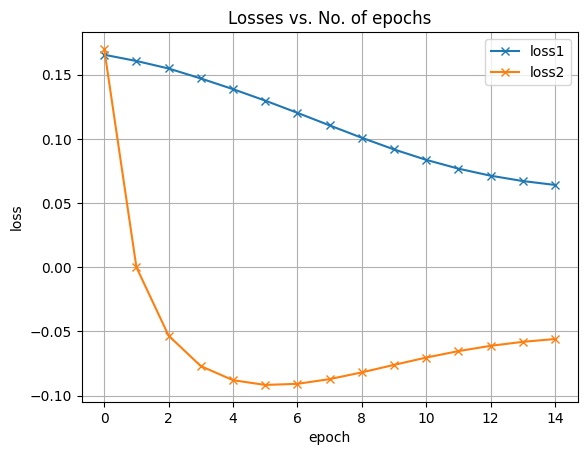

In [ ]:
plot_history(history_sel)

In [ ]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_WADI_2.pth")

# Testing the model with selected columns(WADI)

In [ ]:
checkpoint = torch.load("model_WADI_2.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [ ]:
training_scores_list_sel=training_scores(model_sel,train_loader_sel,val_loader_sel)

In [ ]:
for i in range(len(training_scores_list_sel)):
  print(len(training_scores_list_sel[i]))

704
704
704
704
704
704
704
704
704
704
704
704
704
704
704


In [ ]:
len(training_scores_list_sel)

15

In [ ]:
training_scores_concat_sel=np.concatenate([torch.stack(training_scores_list_sel[:-1]).flatten().detach().cpu().numpy(),
                            training_scores_list_sel[-1].flatten().detach().cpu().numpy()])

In [ ]:
print(training_scores_concat_sel)

[0.05964369 0.04860079 0.04856269 ... 0.02293121 0.02418696 0.02454136]


In [ ]:
min(training_scores_concat_sel)

0.015846953

In [ ]:
results_sel=training_scores(model_sel, test_loader_sel) # testing

In [ ]:
print(results_sel)

[tensor([1082174.0000, 1353446.7500, 1353422.5000, 1353430.5000, 1353391.5000,
        1624152.7500, 1894717.1250, 1623519.0000, 1894103.0000, 1624097.7500,
        1625311.2500, 1354026.0000, 1625873.7500, 1897215.0000, 1897782.8750,
        1897725.7500, 1627135.7500, 1899003.5000, 1899773.5000, 1899769.8750,
        1898128.8750, 2168597.5000, 2166758.5000, 1895398.3750, 1624595.1250,
        1353886.5000, 1353877.7500, 1352746.0000, 1351756.7500, 1623665.7500,
        1353401.6250, 1353291.0000, 1083277.6250, 1354385.2500, 1354367.1250,
        1624890.1250, 1624878.3750, 1624956.0000, 1626450.1250, 1354506.3750,
        1624962.5000, 1354579.6250, 1624608.2500, 1353476.7500, 1623537.0000,
        1623514.1250, 1894953.0000, 1894552.8750, 1622652.0000, 1892975.2500,
        1893180.2500, 1893176.5000, 1623191.5000, 1893102.8750, 1623058.7500,
        1624180.0000, 1352715.1250, 1082411.2500, 1082414.2500, 1084053.5000,
         813402.6250,  813387.9375, 1085071.0000, 1086500.2500,

In [ ]:
windows_labels_wadi=[]
for i in range(len(attack_wadi_label)-window_size):
    windows_labels_wadi.append(list(np.int_(attack_wadi_label[i:i+window_size])))

In [ ]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels_wadi] # this is with the point adjust?

In [ ]:
len(y_test)

10560

In [ ]:
y_pred_sel=np.concatenate([torch.stack(results_sel[:-1]).flatten().detach().cpu().numpy(),
                            results_sel[-1].flatten().detach().cpu().numpy()])

In [ ]:
results_threshold_sel=testing_threshold(model_sel,test_loader_sel,alpha=.5, beta=.5, contamination=0.10)

In [ ]:
results_threshold_sel

1629066.5

In [ ]:
threshold_sel=results_threshold_sel # Decide on your own threshold
y_pred_label_sel = [1.0 if (score > threshold_sel) else 0 for score in y_pred_sel ]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label_sel,pos_label=1)
recall=recall_score(y_test,y_pred_label_sel,pos_label=1)
f1=f1_score(y_test,y_pred_label_sel,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)


precision= 1.0
recall= 0.09990530303030302
f1= 0.1816616444253121
